Steps oin this notebook:
1. Check data
1. Visualise time series: male and female heads of mission (HoMs)
1. Select the EU countries
1. Visualise percentage of female EU HoMs
1. Visualise which countries receive more female ambassadors?
1. What is the percentage of female EU HoMs at G7 countries + China + Russia


# Check data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("gender_diplomacy.csv")
df.head()

,year,cname_send,main_posting,title,gender,cname_receive,ccode_send,ccodealp_send,ccodeCOW_send,region_send,GME_send,v2lgfemleg_send,FFP_send,ccode_receive,ccodealp_receive,ccodeCOW_receive,region_receive,GME_receive,FFP_receive
0,1968,Afghanistan,1,3,0,China,4,AFG,700,1,1,2.0,0,156,CHN,710,1,0,0
1,1968,Afghanistan,1,3,0,Czechoslovakia,4,AFG,700,1,1,2.0,0,200,CSK,315,3,0,0
2,1968,Afghanistan,1,3,0,Egypt,4,AFG,700,1,1,2.0,0,818,EGY,651,4,1,0
3,1968,Afghanistan,1,3,0,France,4,AFG,700,1,1,2.0,0,250,FRA,220,3,0,0
4,1968,Afghanistan,1,3,0,"Germany, Federal Republic of",4,AFG,700,1,1,2.0,0,280,DEU,260,3,0,0


In [3]:
# source: https://www.kaggle.com/code/rajatraj0502/gender-diplomatic-representation
# Display basic information about the dataset
df.info()

# Check for missing values in the dataset
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94509 entries, 0 to 94508
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              94509 non-null  int64  
 1   cname_send        94509 non-null  object 
 2   main_posting      94509 non-null  int64  
 3   title             94509 non-null  int64  
 4   gender            94509 non-null  int64  
 5   cname_receive     94509 non-null  object 
 6   ccode_send        94509 non-null  int64  
 7   ccodealp_send     94509 non-null  object 
 8   ccodeCOW_send     94509 non-null  int64  
 9   region_send       94509 non-null  int64  
 10  GME_send          94509 non-null  int64  
 11  v2lgfemleg_send   94509 non-null  float64
 12  FFP_send          94509 non-null  int64  
 13  ccode_receive     94509 non-null  int64  
 14  ccodealp_receive  94509 non-null  object 
 15  ccodeCOW_receive  94509 non-null  int64  
 16  region_receive    94509 non-null  int64 

year                0
cname_send          0
main_posting        0
title               0
gender              0
cname_receive       0
ccode_send          0
ccodealp_send       0
ccodeCOW_send       0
region_send         0
GME_send            0
v2lgfemleg_send     0
FFP_send            0
ccode_receive       0
ccodealp_receive    0
ccodeCOW_receive    0
region_receive      0
GME_receive         0
FFP_receive         0
dtype: int64

In [29]:
# Let's return a list of the country names used in this dataset.
country_list = df['cname_send'].unique()
country_list

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia, Plurinational State of', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Empire', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Congo, Democratic Republic of the',
       'Congo, Democratic Republic of the ', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Czechoslovakia', "Côte d'Ivoire",
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faroe Islands', 'Fiji', 'F

# Visualise time series: male and female heads of mission (HoMs)

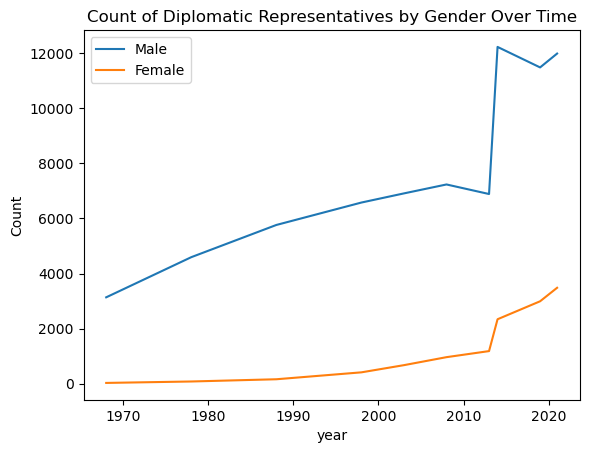

In [5]:
# source: https://www.kaggle.com/code/rajatraj0502/gender-diplomatic-representation

# Create a copy of the DataFrame where gender is not unknown
df_known_gender = df[df['gender'] != 99]

# Group by year and gender, and count the number of rows for each group
gender_counts_by_year = df_known_gender.groupby(['year', 'gender']).size().reset_index(name='count')

# Pivot the DataFrame to have one column for each gender
gender_counts_by_year_pivot = gender_counts_by_year.pivot(index='year', columns='gender', values='count').fillna(0)

# Rename the columns for clarity
gender_counts_by_year_pivot.columns = ['Male', 'Female']

# Plot the counts by year
gender_counts_by_year_pivot.plot(kind='line', title='Count of Diplomatic Representatives by Gender Over Time')
plt.ylabel('Count')
plt.show()

# Select the EU countries

In [6]:
# Create list to only the 27 EU member countries

EU_27 = [
    "Belgium", "Bulgaria", "Czechia", "Denmark", "Germany", "Estonia",
    "Ireland", "Greece", "Spain", "France", "Croatia", "Italy", "Cyprus",
    "Latvia", "Lithuania", "Luxembourg", "Hungary", "Malta", "Netherlands",
    "Austria", "Poland", "Portugal", "Romania", "Slovenia", "Slovakia",
    "Finland", "Sweden"
    ]

In [7]:
# create a new dataframe with the EU countries

EU_df = (df[df['cname_send'].isin(EU_27)])

EU_df.head()

,year,cname_send,main_posting,title,gender,cname_receive,ccode_send,ccodealp_send,ccodeCOW_send,region_send,GME_send,v2lgfemleg_send,FFP_send,ccode_receive,ccodealp_receive,ccodeCOW_receive,region_receive,GME_receive,FFP_receive
4431,1968,Austria,1,2,0,Afghanistan,40,AUT,305,3,0,5.5,0,4,AFG,700,1,1,0
4432,1968,Austria,1,3,0,Argentina,40,AUT,305,3,0,5.5,0,32,ARG,160,7,0,0
4433,1968,Austria,1,3,0,Australia,40,AUT,305,3,0,5.5,0,36,AUS,900,6,0,0
4434,1968,Austria,1,3,0,Barbados,40,AUT,305,3,0,5.5,0,52,BRB,53,2,0,0
4435,1968,Austria,1,3,0,Belgium,40,AUT,305,3,0,5.5,0,56,BEL,211,3,0,0


In [8]:
# count number of missions per year per EU country

EU_total_missions_year = EU_df.groupby(['year', 'cname_send']).size().reset_index(name='number_missions')
EU_total_missions_year = pd.pivot_table(EU_total_missions_year, index= "year", columns="cname_send", values="number_missions")
EU_total_missions_year["EU_27"] = EU_total_missions_year.sum(axis=1)
EU_total_missions_year

cname_send,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,France,...,Malta,Netherlands,Poland,Portugal,Romania,Slovakia,Slovenia,Spain,Sweden,EU_27
year,,,,,,,,,,,,,,,,,,,,,
1968,51.0,64.0,39.0,NaN,7.0,NaN,44.0,NaN,36.0,101.0,...,15.0,67.0,45.0,33.0,44.0,NaN,NaN,57.0,53.0,838.0
1978,62.0,85.0,68.0,NaN,12.0,NaN,57.0,NaN,53.0,131.0,...,22.0,81.0,78.0,55.0,76.0,NaN,NaN,82.0,75.0,1188.0
1988,70.0,84.0,78.0,NaN,16.0,NaN,64.0,NaN,62.0,136.0,...,13.0,84.0,76.0,53.0,78.0,NaN,NaN,83.0,80.0,1246.0
1998,77.0,87.0,82.0,37.0,23.0,85.0,80.0,24.0,70.0,154.0,...,16.0,95.0,93.0,67.0,100.0,61.0,22.0,97.0,83.0,1876.0
2003,80.0,82.0,79.0,47.0,30.0,85.0,75.0,26.0,74.0,156.0,...,21.0,102.0,96.0,70.0,92.0,58.0,33.0,99.0,86.0,1928.0
2008,81.0,86.0,80.0,51.0,36.0,86.0,75.0,29.0,74.0,158.0,...,21.0,110.0,91.0,76.0,91.0,57.0,40.0,110.0,83.0,2014.0
2013,80.0,86.0,78.0,50.0,42.0,82.0,74.0,33.0,68.0,160.0,...,23.0,105.0,87.0,64.0,91.0,58.0,38.0,112.0,80.0,1990.0
2014,193.0,203.0,92.0,84.0,109.0,154.0,188.0,85.0,74.0,180.0,...,97.0,179.0,90.0,86.0,175.0,192.0,93.0,192.0,131.0,3734.0
2019,193.0,186.0,103.0,185.0,142.0,190.0,186.0,87.0,150.0,188.0,...,86.0,118.0,84.0,82.0,148.0,192.0,92.0,184.0,126.0,3704.0


In [9]:
# let's check the dataset again

EU_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22362 entries, 4431 to 80585
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              22362 non-null  int64  
 1   cname_send        22362 non-null  object 
 2   main_posting      22362 non-null  int64  
 3   title             22362 non-null  int64  
 4   gender            22362 non-null  int64  
 5   cname_receive     22362 non-null  object 
 6   ccode_send        22362 non-null  int64  
 7   ccodealp_send     22362 non-null  object 
 8   ccodeCOW_send     22362 non-null  int64  
 9   region_send       22362 non-null  int64  
 10  GME_send          22362 non-null  int64  
 11  v2lgfemleg_send   22362 non-null  float64
 12  FFP_send          22362 non-null  int64  
 13  ccode_receive     22362 non-null  int64  
 14  ccodealp_receive  22362 non-null  object 
 15  ccodeCOW_receive  22362 non-null  int64  
 16  region_receive    22362 non-null  int64  


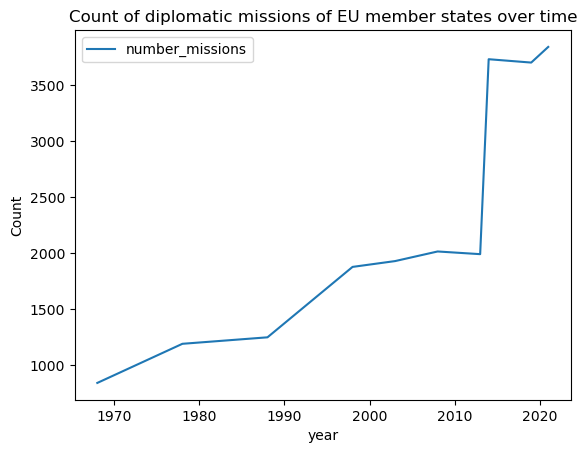

In [10]:
# The previous plot of th enumber of male and female ambassadors showed some steep increases. 
# Let's check whether the number of missions increases over the years, then we now if is better to use percentages.

EU_missions_counts_per_year = EU_df.groupby(['year']).size().reset_index(name='number_missions')
EU_missions_counts_per_year.plot(kind='line', title='Count of diplomatic missions of EU member states over time', x="year")
plt.ylabel('Count')
plt.show()


In [11]:
# df with female ambassadors per year

female_ambassadors = EU_df[EU_df['gender'] == 1]
female_ambassadors = female_ambassadors.groupby(['year', 'cname_send']).size().reset_index(name='count')

# Pivot the DataFrame to have one column for each country
female_ambassadors = female_ambassadors.pivot(index='year', columns='cname_send', values='count').fillna(0)
female_ambassadors["EU_27"] = female_ambassadors.sum(axis=1)
female_ambassadors

cname_send,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,France,...,Malta,Netherlands,Poland,Portugal,Romania,Slovakia,Slovenia,Spain,Sweden,EU_27
year,,,,,,,,,,,,,,,,,,,,,
1968,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0
1978,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,...,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,11.0
1988,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,...,0.0,1.0,0.0,1.0,4.0,0.0,0.0,0.0,1.0,21.0
1998,4.0,4.0,2.0,0.0,3.0,8.0,5.0,1.0,4.0,8.0,...,0.0,4.0,3.0,0.0,5.0,2.0,4.0,3.0,13.0,100.0
2003,7.0,5.0,4.0,6.0,7.0,10.0,2.0,7.0,13.0,12.0,...,1.0,8.0,3.0,5.0,7.0,5.0,5.0,1.0,18.0,157.0
2008,17.0,7.0,4.0,9.0,3.0,11.0,9.0,3.0,21.0,21.0,...,3.0,15.0,17.0,6.0,12.0,4.0,5.0,8.0,25.0,245.0
2013,20.0,8.0,14.0,11.0,2.0,18.0,14.0,3.0,32.0,24.0,...,4.0,17.0,12.0,9.0,18.0,2.0,15.0,11.0,30.0,329.0
2014,49.0,31.0,16.0,20.0,24.0,29.0,40.0,11.0,28.0,28.0,...,10.0,43.0,8.0,7.0,46.0,4.0,41.0,16.0,39.0,695.0
2019,55.0,9.0,29.0,44.0,19.0,28.0,41.0,27.0,65.0,43.0,...,10.0,40.0,19.0,19.0,48.0,30.0,37.0,26.0,69.0,889.0


In [12]:
# Let's calculate the percentages

female_ambassadors = pd.merge(EU_missions_counts_per_year, female_ambassadors, on="year")
female_ambassadors["EU_female_percentage"] = female_ambassadors["EU_27"]/female_ambassadors["number_missions"]*100
female_ambassadors.round(2)



,year,number_missions,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,...,Netherlands,Poland,Portugal,Romania,Slovakia,Slovenia,Spain,Sweden,EU_27,EU_female_percentage
0,1968,838,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,0.48
1,1978,1188,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,11.0,0.93
2,1988,1246,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,4.0,0.0,0.0,0.0,1.0,21.0,1.69
3,1998,1876,4.0,4.0,2.0,0.0,3.0,8.0,5.0,1.0,...,4.0,3.0,0.0,5.0,2.0,4.0,3.0,13.0,100.0,5.33
4,2003,1928,7.0,5.0,4.0,6.0,7.0,10.0,2.0,7.0,...,8.0,3.0,5.0,7.0,5.0,5.0,1.0,18.0,157.0,8.14
5,2008,2014,17.0,7.0,4.0,9.0,3.0,11.0,9.0,3.0,...,15.0,17.0,6.0,12.0,4.0,5.0,8.0,25.0,245.0,12.16
6,2013,1990,20.0,8.0,14.0,11.0,2.0,18.0,14.0,3.0,...,17.0,12.0,9.0,18.0,2.0,15.0,11.0,30.0,329.0,16.53
7,2014,3734,49.0,31.0,16.0,20.0,24.0,29.0,40.0,11.0,...,43.0,8.0,7.0,46.0,4.0,41.0,16.0,39.0,695.0,18.61
8,2019,3704,55.0,9.0,29.0,44.0,19.0,28.0,41.0,27.0,...,40.0,19.0,19.0,48.0,30.0,37.0,26.0,69.0,889.0,24.00
9,2021,3844,58.0,12.0,36.0,45.0,19.0,34.0,52.0,27.0,...,50.0,20.0,17.0,50.0,34.0,35.0,40.0,67.0,1007.0,26.20


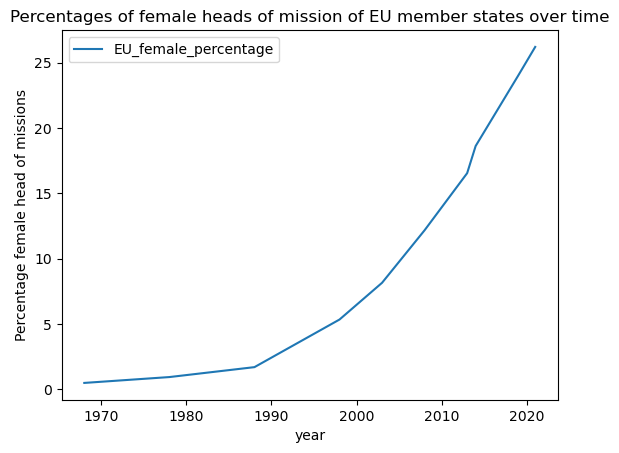

In [13]:
# now letś visualise how the percentage of female EU HoMs changes over the years. 
female_ambassadors.plot(kind='line', title='Percentages of female heads of mission of EU member states over time', x="year", y="EU_female_percentage")
plt.ylabel('Percentage female head of missions')
plt.show()

In [14]:
# Now that we have the overall percenatge. let's also calculate the percentages fro each country
# and merge the two datasets. Let's start merging the datasets.

EU_female_percentages = pd.merge(EU_total_missions_year, female_ambassadors, on="year")
EU_female_percentages




,year,Austria_x,Belgium_x,Bulgaria_x,Croatia_x,Cyprus_x,Czechia_x,Denmark_x,Estonia_x,Finland_x,...,Netherlands_y,Poland_y,Portugal_y,Romania_y,Slovakia_y,Slovenia_y,Spain_y,Sweden_y,EU_27_y,EU_female_percentage
0,1968,51.0,64.0,39.0,NaN,7.0,NaN,44.0,NaN,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,0.477327
1,1978,62.0,85.0,68.0,NaN,12.0,NaN,57.0,NaN,53.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,11.0,0.925926
2,1988,70.0,84.0,78.0,NaN,16.0,NaN,64.0,NaN,62.0,...,1.0,0.0,1.0,4.0,0.0,0.0,0.0,1.0,21.0,1.685393
3,1998,77.0,87.0,82.0,37.0,23.0,85.0,80.0,24.0,70.0,...,4.0,3.0,0.0,5.0,2.0,4.0,3.0,13.0,100.0,5.330490
4,2003,80.0,82.0,79.0,47.0,30.0,85.0,75.0,26.0,74.0,...,8.0,3.0,5.0,7.0,5.0,5.0,1.0,18.0,157.0,8.143154
5,2008,81.0,86.0,80.0,51.0,36.0,86.0,75.0,29.0,74.0,...,15.0,17.0,6.0,12.0,4.0,5.0,8.0,25.0,245.0,12.164846
6,2013,80.0,86.0,78.0,50.0,42.0,82.0,74.0,33.0,68.0,...,17.0,12.0,9.0,18.0,2.0,15.0,11.0,30.0,329.0,16.532663
7,2014,193.0,203.0,92.0,84.0,109.0,154.0,188.0,85.0,74.0,...,43.0,8.0,7.0,46.0,4.0,41.0,16.0,39.0,695.0,18.612748
8,2019,193.0,186.0,103.0,185.0,142.0,190.0,186.0,87.0,150.0,...,40.0,19.0,19.0,48.0,30.0,37.0,26.0,69.0,889.0,24.001080
9,2021,193.0,186.0,103.0,185.0,142.0,190.0,189.0,87.0,150.0,...,50.0,20.0,17.0,50.0,34.0,35.0,40.0,67.0,1007.0,26.196670


In [15]:
# Iterate over each country in the EU 27 list and calculate the percentages

for country in EU_27:
    x_col = f"{country}_x"
    y_col = f"{country}_y"
    
    if x_col in EU_female_percentages.columns and y_col in EU_female_percentages.columns:
        percent_col = f"{country}_percentage"
        EU_female_percentages[percent_col] = EU_female_percentages[y_col] / EU_female_percentages[x_col] * 100

EU_female_percentages.round(2)



,year,Austria_x,Belgium_x,Bulgaria_x,Croatia_x,Cyprus_x,Czechia_x,Denmark_x,Estonia_x,Finland_x,...,Malta_percentage,Netherlands_percentage,Austria_percentage,Poland_percentage,Portugal_percentage,Romania_percentage,Slovenia_percentage,Slovakia_percentage,Finland_percentage,Sweden_percentage
0,1968,51.0,64.0,39.0,NaN,7.0,NaN,44.0,NaN,36.0,...,0.00,0.00,1.96,0.00,0.00,0.00,NaN,NaN,0.00,1.89
1,1978,62.0,85.0,68.0,NaN,12.0,NaN,57.0,NaN,53.0,...,4.55,0.00,1.61,0.00,0.00,2.63,NaN,NaN,5.66,1.33
2,1988,70.0,84.0,78.0,NaN,16.0,NaN,64.0,NaN,62.0,...,0.00,1.19,4.29,0.00,1.89,5.13,NaN,NaN,6.45,1.25
3,1998,77.0,87.0,82.0,37.0,23.0,85.0,80.0,24.0,70.0,...,0.00,4.21,5.19,3.23,0.00,5.00,18.18,3.28,5.71,15.66
4,2003,80.0,82.0,79.0,47.0,30.0,85.0,75.0,26.0,74.0,...,4.76,7.84,8.75,3.12,7.14,7.61,15.15,8.62,17.57,20.93
5,2008,81.0,86.0,80.0,51.0,36.0,86.0,75.0,29.0,74.0,...,14.29,13.64,20.99,18.68,7.89,13.19,12.50,7.02,28.38,30.12
6,2013,80.0,86.0,78.0,50.0,42.0,82.0,74.0,33.0,68.0,...,17.39,16.19,25.00,13.79,14.06,19.78,39.47,3.45,47.06,37.50
7,2014,193.0,203.0,92.0,84.0,109.0,154.0,188.0,85.0,74.0,...,10.31,24.02,25.39,8.89,8.14,26.29,44.09,2.08,37.84,29.77
8,2019,193.0,186.0,103.0,185.0,142.0,190.0,186.0,87.0,150.0,...,11.63,33.90,28.50,22.62,23.17,32.43,40.22,15.62,43.33,54.76
9,2021,193.0,186.0,103.0,185.0,142.0,190.0,189.0,87.0,150.0,...,8.05,37.04,30.05,23.53,20.24,33.56,35.71,17.62,56.67,53.17


In [16]:
# let's select the useful columns
first_column = EU_female_percentages.iloc[:, 0] # the years
last_columns = EU_female_percentages.iloc[:, -28:] # the columns with the percentages
EU_percentages = pd.concat([first_column, last_columns], axis=1)


# delete the suffix "_percentage"
EU_percentages.columns = [col.replace('_percentage', '') for col in EU_percentages.columns]

EU_percentages.round(2)

,year,EU_female,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,...,Malta,Netherlands,Austria,Poland,Portugal,Romania,Slovenia,Slovakia,Finland,Sweden
0,1968,0.48,0.00,0.00,NaN,2.27,NaN,NaN,0.00,0.00,...,0.00,0.00,1.96,0.00,0.00,0.00,NaN,NaN,0.00,1.89
1,1978,0.93,1.18,0.00,NaN,1.75,NaN,NaN,0.00,0.00,...,4.55,0.00,1.61,0.00,0.00,2.63,NaN,NaN,5.66,1.33
2,1988,1.69,2.38,0.00,NaN,0.00,NaN,NaN,0.00,1.72,...,0.00,1.19,4.29,0.00,1.89,5.13,NaN,NaN,6.45,1.25
3,1998,5.33,4.60,2.44,9.41,6.25,8.67,4.17,13.89,1.43,...,0.00,4.21,5.19,3.23,0.00,5.00,18.18,3.28,5.71,15.66
4,2003,8.14,6.10,5.06,11.76,2.67,6.25,26.92,8.51,5.06,...,4.76,7.84,8.75,3.12,7.14,7.61,15.15,8.62,17.57,20.93
5,2008,12.16,8.14,5.00,12.79,12.00,6.90,10.34,10.53,7.50,...,14.29,13.64,20.99,18.68,7.89,13.19,12.50,7.02,28.38,30.12
6,2013,16.53,9.30,17.95,21.95,18.92,11.49,9.09,17.54,12.35,...,17.39,16.19,25.00,13.79,14.06,19.78,39.47,3.45,47.06,37.50
7,2014,18.61,15.27,17.39,18.83,21.28,15.34,12.94,27.27,18.97,...,10.31,24.02,25.39,8.89,8.14,26.29,44.09,2.08,37.84,29.77
8,2019,24.00,4.84,28.16,14.74,22.04,18.75,31.03,38.52,20.78,...,11.63,33.90,28.50,22.62,23.17,32.43,40.22,15.62,43.33,54.76
9,2021,26.20,6.45,34.95,17.89,27.51,24.23,31.03,40.15,25.65,...,8.05,37.04,30.05,23.53,20.24,33.56,35.71,17.62,56.67,53.17


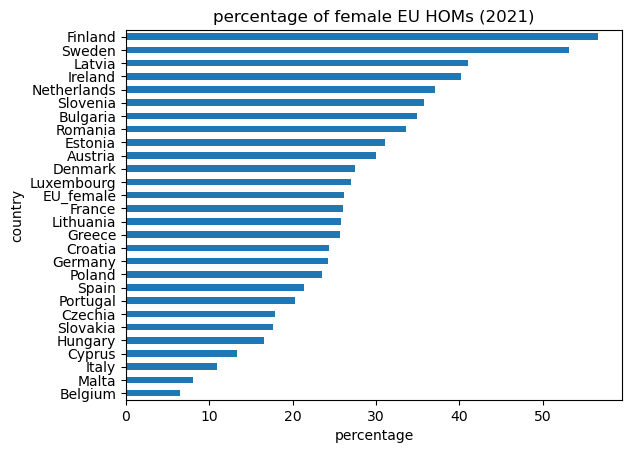

In [17]:
# year 2021 bar chart of percentages of member countries

year2021 = EU_percentages.iloc[9]
year2021 = year2021[1:]
year2021 = year2021.sort_values()
year2021.plot(kind='barh', title='percentage of female EU HOMs (2021)')
plt.ylabel('country')
plt.xlabel('percentage')
plt.show()

# Visualise which countries receive the most female ambassadors

In [18]:
# Which countries receive the most female EU heads of missions?

receive_ambassadors = EU_df.query("gender == 1")
receive_ambassadors = receive_ambassadors[["year", "cname_send", "cname_receive"]]
receive_ambassadors = pd.pivot_table(receive_ambassadors, index= "year", columns="cname_receive", values="cname_send", aggfunc='count')
receive_ambassadors["total_female_HoMs"] = receive_ambassadors.sum(axis=1)
receive_ambassadors = receive_ambassadors.fillna(0)
receive_ambassadors.loc['total']= receive_ambassadors.sum()
receive_ambassadors



cname_receive,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uzbekistan,Vanuatu,"Venezuela, Bolivarian Republic of",Viet Nam,Virgin Islands,Yemen,Yugoslavia,Zambia,Zimbabwe,total_female_HoMs
year,,,,,,,,,,,,,,,,,,,,,
1968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0
1978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.0
1988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,21.0
1998,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,100.0
2003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,157.0
2008,0.0,3.0,3.0,0.0,0.0,0.0,0.0,6.0,2.0,1.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,245.0
2013,0.0,2.0,3.0,0.0,3.0,0.0,0.0,5.0,0.0,3.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0,2.0,329.0
2014,0.0,4.0,5.0,4.0,5.0,2.0,2.0,6.0,3.0,4.0,...,1.0,2.0,1.0,10.0,1.0,0.0,0.0,2.0,2.0,695.0
2019,1.0,9.0,9.0,9.0,3.0,0.0,4.0,9.0,9.0,9.0,...,3.0,2.0,2.0,4.0,0.0,0.0,0.0,4.0,5.0,889.0


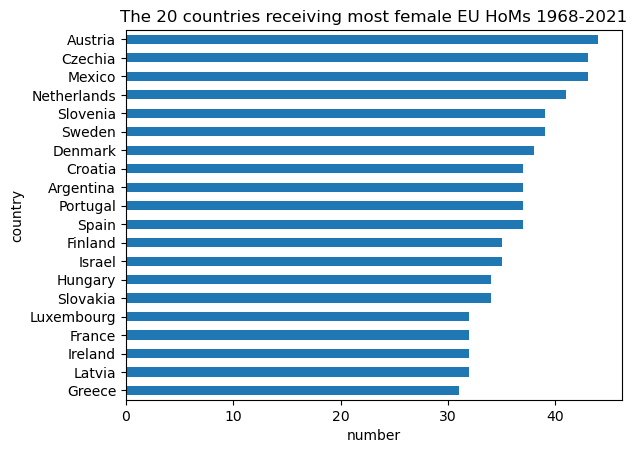

In [19]:
total = receive_ambassadors.loc["total"][:-1] #excluding last column with totals
total = total.nlargest(n=20, keep='first') # selecting the n highest scoring countries

total = total.sort_values(ascending=True)

total.plot(kind='barh', title='The 20 countries receiving most female EU HoMs 1968-2021')
plt.ylabel('country')
plt.xlabel('number')
plt.show()

# Percentage of female EU HoMs at G7 countries + China + Russia?

In [20]:
# Let's count G7 countries plus Russia and China. For Germany I use the federal republic and unified Germany
top_missions = EU_df.query('cname_receive == "Germany" | cname_receive == "France" | cname_receive == "China" | \
    cname_receive == "United Kingdom of Great Britain and Northern Ireland" | cname_receive == "United States of America"|\
    cname_receive == "Germany, Federal Republic of" | cname_receive == "Russian Federation"|\
    cname_receive == "Italy" | cname_receive == "Canada" | cname_receive == "Japan"')
top_missions.head()

,year,cname_send,main_posting,title,gender,cname_receive,ccode_send,ccodealp_send,ccodeCOW_send,region_send,GME_send,v2lgfemleg_send,FFP_send,ccode_receive,ccodealp_receive,ccodeCOW_receive,region_receive,GME_receive,FFP_receive
4439,1968,Austria,1,3,0,Canada,40,AUT,305,3,0,5.5,0,124,CAN,20,2,0,0
4447,1968,Austria,1,3,0,France,40,AUT,305,3,0,5.5,0,250,FRA,220,3,0,0
4454,1968,Austria,1,3,0,Italy,40,AUT,305,3,0,5.5,0,380,ITA,325,3,0,0
4455,1968,Austria,1,3,0,Japan,40,AUT,305,3,0,5.5,0,392,JPN,740,1,0,0
4476,1968,Austria,1,3,0,United Kingdom of Great Britain and Northern I...,40,AUT,305,3,0,5.5,0,826,GBR,200,3,0,0


In [24]:
female_top_missions = top_missions.query("gender == 1")
female_top_missions = female_top_missions[["year", "cname_send", "cname_receive"]]
female_top_missions = pd.pivot_table(female_top_missions, index= "year", columns="cname_send", values="cname_receive", aggfunc='count')
female_top_missions.round(2)
female_top_missions.head()


cname_send,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,France,...,Lithuania,Luxembourg,Malta,Netherlands,Poland,Portugal,Romania,Slovakia,Slovenia,Sweden
year,,,,,,,,,,,,,,,,,,,,,
1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,1.0,NaN,1.0,1.0,2.0,NaN,NaN,3.0,NaN,NaN,...,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN
2008,NaN,NaN,2.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,1.0,2.0,NaN,1.0,NaN,1.0,2.0


In [25]:
female_top_missions["EU_27"] = female_top_missions.sum(axis=1)
female_top_missions["EU_female_percentage"] = female_top_missions["EU_27"]/(9*27)*100
female_top_missions.round(2)


cname_send,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,France,...,Malta,Netherlands,Poland,Portugal,Romania,Slovakia,Slovenia,Sweden,EU_27,EU_female_percentage
year,,,,,,,,,,,,,,,,,,,,,
1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.41
1988,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.82
1998,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.88
2003,1.0,NaN,1.0,1.0,2.0,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,15.0,6.17
2008,NaN,NaN,2.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,2.0,NaN,1.0,NaN,1.0,2.0,17.0,7.00
2013,4.0,NaN,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,...,2.0,2.0,NaN,NaN,3.0,1.0,5.0,3.0,36.0,14.81
2014,4.0,NaN,1.0,1.0,NaN,1.0,1.0,4.0,2.0,2.0,...,3.0,1.0,NaN,NaN,2.0,1.0,4.0,4.0,47.0,19.34
2019,NaN,1.0,2.0,1.0,NaN,1.0,2.0,2.0,3.0,4.0,...,2.0,NaN,1.0,NaN,1.0,NaN,1.0,4.0,39.0,16.05
2021,2.0,1.0,3.0,1.0,1.0,2.0,3.0,NaN,3.0,3.0,...,NaN,1.0,1.0,1.0,2.0,NaN,4.0,4.0,55.0,22.63


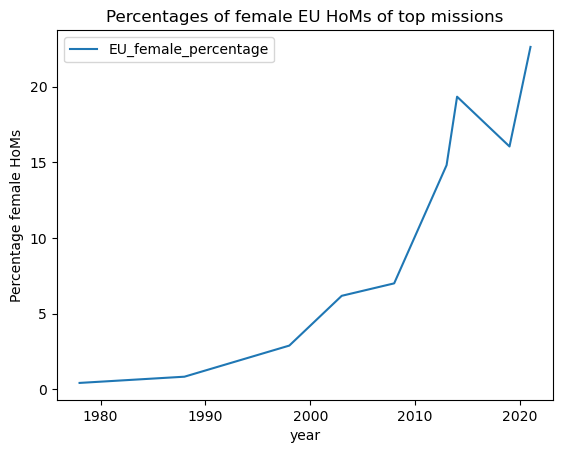

In [26]:
female_top_missions.plot(kind='line', title='Percentages of female EU HoMs of top missions', y="EU_female_percentage")
plt.ylabel('Percentage female HoMs')
plt.show()


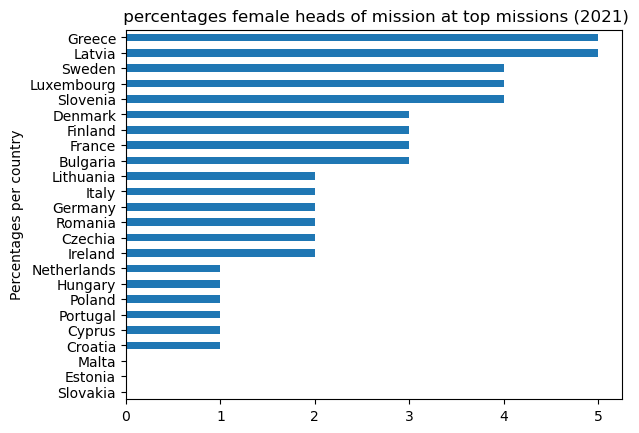

In [27]:
year2021 = female_top_missions.iloc[8]
year2021 = year2021[2:-2]
year2021 = year2021.fillna(0)
year2021 = year2021.sort_values(ascending=True)
year2021
year2021.plot(kind='barh', title=' percentages female heads of mission at top missions (2021)')
plt.ylabel('Percentages per country')
plt.show()


In [ ]:
# countries receiving most EU female head of missions
